In [16]:

import pandas as pd

# Load the CSV file
df = pd.read_csv('data.csv')
df.head()


,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


I have loaded the dataset into a dataframe and dislayed few rows.

In [17]:
# basic statistical description
description = df.describe()
print(description)
# Check for null values
null_values = df.isnull().sum()
print(null_values)
# If there are any null values, replace them with the mean of the respective columns
df.fillna(df.mean(), inplace=True)

description


         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


describe function is used to diaply the statistical description next i have checked foe the nulls values in each column and the calories column has 5 null values and i replace those 5 null values with the mean of that column and finally displayed the dataframe.



In [4]:
# Aggregate data using min, max, count, and mean for 'Duration' and 'Calories'
aggregation = df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean'])

# Filter the dataframe to select rows with calories between 500 and 1000
calories_500_1000 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]

# Filter the dataframe to select rows with calories > 500 and pulse < 100
calories_pulse_filter = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]

aggregation, calories_500_1000.head(), calories_pulse_filter.head()



(         Duration     Calories
 min     15.000000    50.300000
 max    300.000000  1860.400000
 count  169.000000   169.000000
 mean    63.846154   375.790244,
     Duration  Pulse  Maxpulse  Calories
 51        80    123       146     643.1
 62       160    109       135     853.0
 65       180     90       130     800.4
 66       150    105       135     873.4
 67       150    107       130     816.0,
     Duration  Pulse  Maxpulse  Calories
 65       180     90       130     800.4
 70       150     97       129    1115.0
 73       150     97       127     953.2
 75        90     98       125     563.2
 99        90     93       124     604.1)

here agg function is used to diaply the aggretions on the each column and filtered the data based on the criteria i.e calories between 500 and 1000
and next data selection is based on the calories above 500 and pulse less than 100
and finally we diaplyed the dataframe.

In [5]:
# Create a new dataframe excluding the 'Maxpulse' column
df_modified = df.drop(columns=['Maxpulse'])

# Delete the 'Maxpulse' column from the original dataframe
df.drop(columns=['Maxpulse'], inplace=True)

# Convert 'Calories' column to integer datatype
df['Calories'] = df['Calories'].astype(int)

# Display the first few rows of df_modified and df to verify
print(df_modified.head())
print(df.head())


   Duration  Pulse  Calories
0        60    110     409.1
1        60    117     479.0
2        60    103     340.0
3        45    109     282.4
4        45    117     406.0
   Duration  Pulse  Calories
0        60    110       409
1        60    117       479
2        60    103       340
3        45    109       282
4        45    117       406


create the modified dataframe with the exclusion of Maxpulse column and later the drop the Maxpulse column from the original dataframe.
convert the data type of the calories column to int and displayed the dataframe.

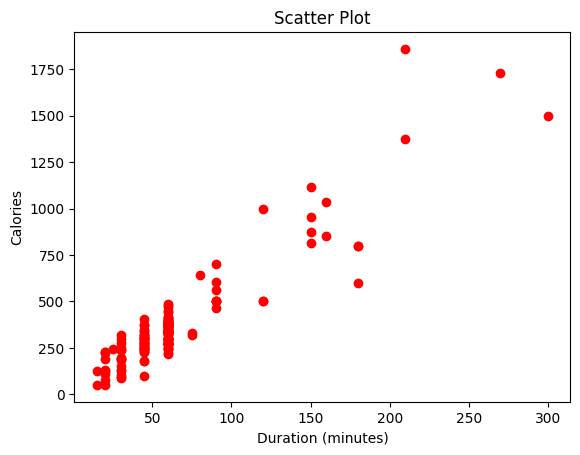

In [15]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['Duration'], df['Calories'], color='red')

# Add title and labels
plt.title('Scatter Plot')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories')

plt.show()


the above plot shows the scatterplot between calories and duration column.

Mean Squared Error: 35301898.887134895


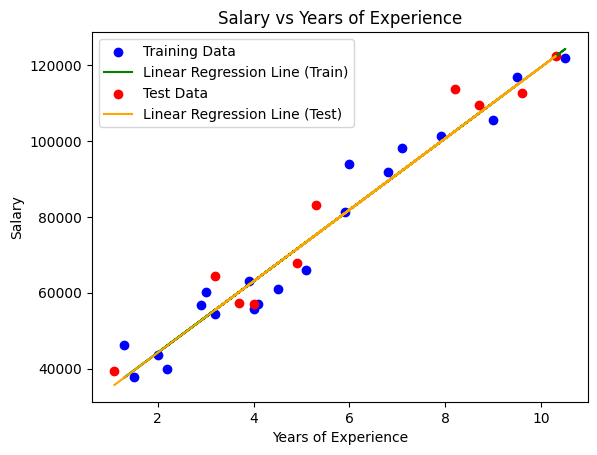

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('/content/Salary_Data .csv')

# Split the data into train and test sets (1/3 test)
X = data[['YearsExperience']]  # Feature column
y = data['Salary']  # Target column

# Split the data with 1/3 reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=20)

# Step c: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Step d: Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='green', label='Linear Regression Line (Train)')

# Scatter plot for testing data
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='orange', label='Linear Regression Line (Test)')

# Adding labels and title
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Show the plot
plt.show()


Linear Regression:
a) Import the given “Salary_Data.csv”

b) Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

c) Train and predict the model.

d) Calculate the mean_squared error

e) Visualize both train and test data using scatter plot